## CAT BREED DETECTION ( USING INCEPTION NN )
As mandatory part of assignment for the machine learning internship

# **1.Libraries**

**Importing required libraries**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Add
from tensorflow.keras.layers import Flatten
from tensorflow.nn import local_response_normalization

import os
import re

import imageio

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

# **2. Data**

**Reading the cats data set and storing as a pandas dataframe**

In [2]:
cats = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/data/cats.csv")

**Exploring the data set**

In [3]:
cats.head()

,Unnamed: 0,id,url,type,age,gender,size,coat,breed,photos,med_photos
0,0,46744842,https://www.petfinder.com/cat/arianna-46744842...,Cat,Adult,Female,Medium,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
1,1,46717321,https://www.petfinder.com/cat/ozzy-46717321/oh...,Cat,Adult,Male,Extra Large,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
2,2,46626338,https://www.petfinder.com/cat/zena-46626338/ca...,Cat,Senior,Female,Medium,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
3,3,46620170,https://www.petfinder.com/cat/mika-46620170/ca...,Cat,Baby,Female,Small,Short,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
4,4,46582751,https://www.petfinder.com/cat/ruby-46582751/fl...,Cat,Young,Female,Medium,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...


**keeping only those rows which have required breeds in the breed column of cats dataset**

In [3]:
required_breeds = ["Bombay", "Calico", "Burmese", "Himalayan",
"Munchkin", "Ragdoll", "Siberian", "British Shorthair", "Russian Blue", "Dilute Calico"]

In [4]:
cats = cats[cats["breed"].isin(required_breeds)]

In [6]:
cats.head()

,Unnamed: 0,id,url,type,age,gender,size,coat,breed,photos,med_photos
8045,8918,46749057,https://www.petfinder.com/cat/midnight-is-magi...,Cat,Baby,Male,Medium,Medium,Bombay,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
8046,8919,46748774,https://www.petfinder.com/cat/sweetness-sarah-...,Cat,Baby,Female,Medium,Short,Bombay,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
8047,8920,46748733,https://www.petfinder.com/cat/stella-is-a-star...,Cat,Baby,Female,Medium,Short,Bombay,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
8048,8921,46732469,https://www.petfinder.com/cat/maggie-46732469/...,Cat,Adult,Female,Large,Short,Bombay,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
8049,8922,46709293,https://www.petfinder.com/cat/elm-46709293/ny/...,Cat,Baby,Female,Small,Short,Bombay,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...


**checking the dataframe**

In [7]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15271 entries, 8045 to 53404
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  15271 non-null  int64 
 1   id          15271 non-null  int64 
 2   url         15271 non-null  object
 3   type        15271 non-null  object
 4   age         15271 non-null  object
 5   gender      15271 non-null  object
 6   size        15271 non-null  object
 7   coat        10351 non-null  object
 8   breed       15271 non-null  object
 9   photos      15271 non-null  object
 10  med_photos  15271 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.4+ MB


**Keeping only the breed and id column.**

In [5]:
cats = cats[["id","breed"]]

In [9]:
cats["breed"].unique()

array(['Bombay', 'British Shorthair', 'Burmese', 'Calico',
       'Dilute Calico', 'Himalayan', 'Munchkin', 'Ragdoll',
       'Russian Blue', 'Siberian'], dtype=object)

In [10]:
cats.head()

,id,breed
8045,46749057,Bombay
8046,46748774,Bombay
8047,46748733,Bombay
8048,46732469,Bombay
8049,46709293,Bombay


In [6]:
cats = cats.reset_index(drop=True)

In [12]:
cats.head()

,id,breed
0,46749057,Bombay
1,46748774,Bombay
2,46748733,Bombay
3,46732469,Bombay
4,46709293,Bombay


**Getting images from the directory**

images are named diff than the ids but begin with the id,


we are making list of all images in library and than we can import than by checking the strings

In [7]:
dir_list = {}

We are importing file names only from only those breeds that we require

In [8]:
for i in required_breeds:
    temp = os.listdir(f"/content/drive/MyDrive/Colab Notebooks/Data/images/{i}")
    dir_list[f"{i}"] = temp 

saving the fileadresses

as the filenames are not same to id we compile a re pattern which starts with the id and search for the respective filenames

Also some entries present dont have any corresponding image we are dropping the whole row linked to those

In [9]:
fileadresses = []
for ind in cats.index:
    id = cats["id"][ind]
    r = re.compile(f"^{id}")
    breed = cats["breed"][ind]
    temp = list(filter(r.match, dir_list[breed]))
    if len(temp) == 0:
        print(id)
        cats.drop(index = ind, inplace = True)
        continue
    temp = temp[0]
    fileadresses.append(f"/content/drive/MyDrive/Colab Notebooks/Data/images/{breed}/{temp}")

46532774
46523635
46616855
46430050
46351687
46630175
46612646


checking to make sure the column entries are corresponding

In [16]:
print(fileadresses[8])
print(cats["id"][8])

/content/drive/MyDrive/Colab Notebooks/Data/images/Bombay/46672330_87.jpg
46672330


reseting cats index again 

In [10]:
cats = cats.reset_index(drop=True)

In [18]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15264 entries, 0 to 15263
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      15264 non-null  int64 
 1   breed   15264 non-null  object
dtypes: int64(1), object(1)
memory usage: 238.6+ KB


Dilute Calico 40676093
/content/drive/MyDrive/Colab Notebooks/Data/images/Dilute Calico/40676093_2811.jpg


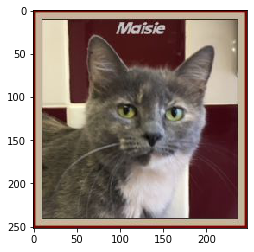

In [19]:
img = imageio.imread(fileadresses[7000])
plt.imshow(img)
print(cats["breed"][7000],cats["id"][7000])
print(fileadresses[7000])

In [11]:
cats["adresses"] = fileadresses

In [12]:
train, val, test = np.split(cats.sample(frac=1, random_state=42),[int(.6*len(cats)), int(.8*len(cats))])

In [22]:
len(train),len(test),len(val)

(9158, 3053, 3053)

**Forming train val test Datasets**


firstly we have to compute the one hot vectors for the breeds

In [13]:
required_breeds = np.unique(cats["breed"])

In [27]:
def one_hot(df,required_breeds):
    boolean_breeds = [(breed == np.array(required_breeds)).astype(int) for breed in df]
    breeds = tf.constant(boolean_breeds)
    return breeds

Saving the images into tensors and preprocessing them 

Converting them into shape (224, 224) with three channels

In [25]:
def form_dataset(adresses, breeds):
    image_filenames = tf.constant(adresses)
    dataset = tf.data.Dataset.from_tensor_slices((image_filenames, (breeds, breeds, breeds)))
    return dataset

In [26]:
def process_path(fileadresses, breeds):
    img = tf.io.read_file(fileadresses)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return img, breeds

def preprocess(image, breeds):
    input_image = tf.image.resize(image, (224, 224), method='nearest')

    input_image = input_image / 255.
    return input_image, breeds


train data sets

In [27]:
train_breeds = one_hot(train["breed"], required_breeds)
train_dataset = form_dataset(train["adresses"], train_breeds)
train_image_ds = train_dataset.map(process_path)
processed_train_image_ds = train_image_ds.map(preprocess)

Val data sets

In [28]:
val_breeds = one_hot(val["breed"], required_breeds)
val_dataset = form_dataset(val["adresses"], val_breeds)
val_image_ds = val_dataset.map(process_path)
processed_val_image_ds = val_image_ds.map(preprocess)

test data sets

In [14]:
def form_dataset_test(adresses):
    image_filenames = tf.constant(adresses)
    dataset = tf.data.Dataset.from_tensor_slices(image_filenames)
    return dataset

def process_path_test(fileadresses):
    img = tf.io.read_file(fileadresses)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return img

def preprocess_test(image):
    input_image = tf.image.resize(image, (224, 224), method='nearest')

    input_image = input_image / 255.
    return input_image

In [28]:
test_breeds = one_hot(test["breed"], required_breeds)
test_dataset = form_dataset_test(test["adresses"])
test_image_ds = test_dataset.map(process_path_test)
processed_test_image_ds = test_image_ds.map(preprocess_test)

#3.Model

forming the required inception model fro the classification purposes

we used the googleNet netwrok from research paper **Going deeper with convolutions**. (https://arxiv.org/pdf/1409.4842.pdf)

In [19]:
def inception_block(input, no_1x1, no_3x3,
                    no_3x3_reduce,no_5x5,no_5x5_reduce,pool, average_pool = False, Max_pool = False):
    x = input
    #optional maxpooling layer
    if Max_pool == True:
        x = MaxPooling2D(pool_size=(3, 3), strides=2,padding='same')(x)

    # first branch
    x1 = Conv2D(no_1x1, 1, activation = 'relu',padding='same')(x)

    # second branch
    x2 = Conv2D(no_3x3_reduce, 1, activation = 'relu',padding='same')(x)
    x2 = Conv2D(no_3x3, 3, activation = 'relu',padding='same')(x2)

    # third branch
    x3 = Conv2D(no_5x5_reduce, 1, activation = 'relu',padding='same')(x)
    x3 = Conv2D(no_5x5, 5, activation = 'relu',padding='same')(x3)

    # fourth branch
    x4 = MaxPooling2D(pool_size=(3, 3), strides=1, padding='same')(x)
    x4 = Conv2D(pool, 1, activation = 'relu',padding='same')(x4)

    x_joined = Concatenate(axis = -1)([x1,x2,x3,x4])
    #optional branch for auxilary output
    if average_pool == True:
        x5 = AveragePooling2D(pool_size=(5, 5), strides=3, padding='valid')(x)
        x5 = Conv2D(128, 1, activation = 'relu', strides=1, padding='same')(x5)
        x5 = Flatten()(x5)
        x5 = Dense(1024,  activation = 'relu')(x5)
        x5 = Dropout(0.7)(x5)
        x5 = Dense(10, activation = 'softmax')(x5)
        output = Activation('softmax')(x5)
        return x_joined, output

    return x_joined

In [18]:

def cat_classifier(input_size=(224, 224, 3)):
    inputs = Input(input_size)

    # pre inception blocks
    x = Conv2D(64, 7, strides = 2, activation = 'relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)
    x = local_response_normalization(x)
    x = Conv2D(64, 1, activation = 'relu')(x)
    x = Conv2D(192, 3, activation = 'relu', padding='same')(x)
    x = local_response_normalization(x)

    #block1
    x = inception_block(x, no_1x1 = 64, no_3x3 = 128,
                    no_3x3_reduce = 96, no_5x5 = 32, no_5x5_reduce = 16, pool = 32,Max_pool = True, )

    #block2
    x = inception_block(x, no_1x1 = 128, no_3x3 = 192,
                    no_3x3_reduce = 128, no_5x5 = 96, no_5x5_reduce = 32, pool = 64)
    
    #block3
    x = inception_block(x, no_1x1 = 192, no_3x3 = 208,
                    no_3x3_reduce = 96, no_5x5 = 48, no_5x5_reduce = 16, pool = 64, Max_pool = True)     
    
    #block4
    x, aux_out1 = inception_block(x, no_1x1 = 160, no_3x3 = 224,
                    no_3x3_reduce = 112, no_5x5 = 64, no_5x5_reduce = 24, pool = 64, average_pool = True)      
    
    #block5
    x = inception_block(x, no_1x1 = 128, no_3x3 = 256,
                    no_3x3_reduce = 128, no_5x5 = 64, no_5x5_reduce = 24, pool = 64)
    
    #block6
    x = inception_block(x, no_1x1 = 112, no_3x3 = 288,
                    no_3x3_reduce = 144, no_5x5 = 64, no_5x5_reduce = 32, pool = 64)
    
    #block7
    x, aux_out2 = inception_block(x, no_1x1 = 256, no_3x3 = 320,
                    no_3x3_reduce = 160, no_5x5 = 128, no_5x5_reduce = 32, pool = 128, average_pool = True)     
    
    #block8
    x = inception_block(x, no_1x1 = 256, no_3x3 = 320,
                    no_3x3_reduce = 160, no_5x5 = 128, no_5x5_reduce = 32, pool = 128, Max_pool = True)    

    #block9      
    x = inception_block(x, no_1x1 = 384, no_3x3 = 384,
                    no_3x3_reduce = 192, no_5x5 = 128, no_5x5_reduce = 48, pool = 128)

    x = AveragePooling2D(pool_size=(7, 7), strides= 1)(x)
    x = Flatten()(x)
    x = Dropout(0.4)(x)
    x = Dense(10)(x)
    output = Activation('softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=[aux_out1, aux_out2, output])

    return model

In [32]:
model = cat_classifier()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 56, 56, 64)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
tf.nn.local_response_normalizat (None, 56, 56, 64)   0           max_pooling2d[0][0]              
______________________________________________________________________________________________

In [33]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], loss_weights = [0.3/1.6,0.3/1.6,1/1.6])

In [34]:
EPOCHS = 40
BUFFER_SIZE = 500
BATCH_SIZE = 32
processed_train_image_ds.batch(BATCH_SIZE)
train_dataset = processed_train_image_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
processed_val_image_ds.batch(BATCH_SIZE)
val_dataset = processed_val_image_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


In [35]:
print(processed_train_image_ds.element_spec)
print(processed_val_image_ds.element_spec)

(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), (TensorSpec(shape=(10,), dtype=tf.int32, name=None), TensorSpec(shape=(10,), dtype=tf.int32, name=None), TensorSpec(shape=(10,), dtype=tf.int32, name=None)))
(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), (TensorSpec(shape=(10,), dtype=tf.int32, name=None), TensorSpec(shape=(10,), dtype=tf.int32, name=None), TensorSpec(shape=(10,), dtype=tf.int32, name=None)))


In [36]:
history = model.fit(train_dataset, epochs=EPOCHS, 
            validation_data=val_dataset,
            validation_freq=1)

Epoch 1/40
287/287 [==============================] - 312s 977ms/step - loss: 2.0815 - activation_loss: 2.2141 - activation_1_loss: 2.2131 - activation_2_loss: 2.0022 - activation_accuracy: 0.2196 - activation_1_accuracy: 0.2277 - activation_2_accuracy: 0.2201 - val_loss: 2.0793 - val_activation_loss: 2.2135 - val_activation_1_loss: 2.2142 - val_activation_2_loss: 1.9985 - val_activation_accuracy: 0.2159 - val_activation_1_accuracy: 0.2159 - val_activation_2_accuracy: 0.2159
Epoch 2/40
287/287 [==============================] - 75s 262ms/step - loss: 2.0679 - activation_loss: 2.2079 - activation_1_loss: 2.2075 - activation_2_loss: 1.9841 - activation_accuracy: 0.2257 - activation_1_accuracy: 0.2252 - activation_2_accuracy: 0.2213 - val_loss: 2.0794 - val_activation_loss: 2.2139 - val_activation_1_loss: 2.2135 - val_activation_2_loss: 1.9989 - val_activation_accuracy: 0.2159 - val_activation_1_accuracy: 0.2159 - val_activation_2_accuracy: 0.2159
Epoch 3/40
287/287 [=====================

In [48]:
y_test = test_breeds

In [51]:
test_dataset = processed_test_image_ds.batch(BATCH_SIZE)

In [43]:
print(processed_test_image_ds.element_spec)

(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), (TensorSpec(shape=(10,), dtype=tf.int32, name=None), TensorSpec(shape=(10,), dtype=tf.int32, name=None), TensorSpec(shape=(10,), dtype=tf.int32, name=None)))


In [52]:
y_preds = model.predict(test_dataset)

In [54]:
y_preds[2]

array([[0.1098357 , 0.03332327, 0.02253697, ..., 0.16289836, 0.12669447,
        0.01212629],
       [0.1098357 , 0.03332327, 0.02253697, ..., 0.16289836, 0.12669447,
        0.01212629],
       [0.1098357 , 0.03332327, 0.02253697, ..., 0.16289836, 0.12669447,
        0.01212629],
       ...,
       [0.10983571, 0.03332328, 0.02253697, ..., 0.16289838, 0.12669449,
        0.01212629],
       [0.10983571, 0.03332328, 0.02253697, ..., 0.16289838, 0.12669449,
        0.01212629],
       [0.10983571, 0.03332328, 0.02253697, ..., 0.16289838, 0.12669449,
        0.01212629]], dtype=float32)

In [56]:
m = tf.keras.metrics.AUC(num_thresholds=3)
m.update_state(y_test, y_preds[2])
m.result().numpy()

0.5

Auc score of 0.5 shows no discrimination. 


Trying to improve the model

redifining the datasets for 1 output

In [25]:
def form_dataset(adresses, breeds):
    image_filenames = tf.constant(adresses)
    dataset = tf.data.Dataset.from_tensor_slices((image_filenames,breeds))
    return dataset
    
def process_path(fileadresses, breeds):
    img = tf.io.read_file(fileadresses)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return img, breeds

def preprocess(image, breeds):
    input_image = tf.image.resize(image, (224, 224), method='nearest')

    input_image = input_image / 255.
    return input_image, breeds

In [29]:
train_breeds = one_hot(train["breed"], required_breeds)
train_dataset = form_dataset(train["adresses"], train_breeds)
train_image_ds = train_dataset.map(process_path)
processed_train_image_ds = train_image_ds.map(preprocess)

In [30]:
val_breeds = one_hot(val["breed"], required_breeds)
val_dataset = form_dataset(val["adresses"], val_breeds)
val_image_ds = val_dataset.map(process_path)
processed_val_image_ds = val_image_ds.map(preprocess)

Removing auxiliary outputs

In [73]:
def cat_classifier2(input_size=(224, 224, 3)):
    inputs = Input(input_size)

    # pre inception blocks
    x = Conv2D(64, 7, strides = 2, activation = 'relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)
    x = local_response_normalization(x)
    x = Conv2D(64, 1, activation = 'relu')(x)
    x = Conv2D(192, 3, activation = 'relu', padding='same')(x)
    x = local_response_normalization(x)

    #block1
    x = inception_block(x, no_1x1 = 64, no_3x3 = 128,
                    no_3x3_reduce = 96, no_5x5 = 32, no_5x5_reduce = 16, pool = 32,Max_pool = True, )

    #block2
    x = inception_block(x, no_1x1 = 128, no_3x3 = 192,
                    no_3x3_reduce = 128, no_5x5 = 96, no_5x5_reduce = 32, pool = 64)
    
    #block3
    x = inception_block(x, no_1x1 = 192, no_3x3 = 208,
                    no_3x3_reduce = 96, no_5x5 = 48, no_5x5_reduce = 16, pool = 64, Max_pool = True)     
    
    #block4
    x= inception_block(x, no_1x1 = 160, no_3x3 = 224,
                    no_3x3_reduce = 112, no_5x5 = 64, no_5x5_reduce = 24, pool = 64)      
    
    #block5
    x = inception_block(x, no_1x1 = 128, no_3x3 = 256,
                    no_3x3_reduce = 128, no_5x5 = 64, no_5x5_reduce = 24, pool = 64)
    
    #block6
    x = inception_block(x, no_1x1 = 112, no_3x3 = 288,
                    no_3x3_reduce = 144, no_5x5 = 64, no_5x5_reduce = 32, pool = 64)
    
    #block7
    x= inception_block(x, no_1x1 = 256, no_3x3 = 320,
                    no_3x3_reduce = 160, no_5x5 = 128, no_5x5_reduce = 32, pool = 128)     
    
    #block8
    x = inception_block(x, no_1x1 = 256, no_3x3 = 320,
                    no_3x3_reduce = 160, no_5x5 = 128, no_5x5_reduce = 32, pool = 128, Max_pool = True)    

    #block9      
    x = inception_block(x, no_1x1 = 384, no_3x3 = 384,
                    no_3x3_reduce = 192, no_5x5 = 128, no_5x5_reduce = 48, pool = 128)

    x = AveragePooling2D(pool_size=(7, 7), strides= 1)(x)
    x = Flatten()(x)
    x = Dropout(0.4)(x)
    x = Dense(10)(x)
    output = Activation('softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=output)

    return model

In [66]:
model = cat_classifier2()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_59 (Conv2D)              (None, 112, 112, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_13 (MaxPooling2D) (None, 56, 56, 64)   0           conv2d_59[0][0]                  
__________________________________________________________________________________________________
tf.nn.local_response_normalizat (None, 56, 56, 64)   0           max_pooling2d_13[0][0]           
____________________________________________________________________________________________

Removing loss weights

In [67]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
EPOCHS = 40
BUFFER_SIZE = 500
BATCH_SIZE = 32
processed_train_image_ds.batch(BATCH_SIZE)
train_dataset = processed_train_image_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
processed_val_image_ds.batch(BATCH_SIZE)
val_dataset = processed_val_image_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [1]:
history = model.fit(train_dataset, epochs=EPOCHS, 
            validation_data=val_dataset,
            validation_freq=1)

NameError: ignored

In [70]:
y_test = test_breeds
test_dataset = processed_test_image_ds.batch(BATCH_SIZE)
y_preds = model.predict(test_dataset)

In [71]:
m = tf.keras.metrics.AUC(num_thresholds=3)
m.update_state(y_test, y_preds)
m.result().numpy()

0.5

Inceasing the no of inception blocks

In [21]:
def cat_classifier3(input_size=(224, 224, 3)):
    inputs = Input(input_size)

    # pre inception blocks
    x = Conv2D(64, 7, strides = 2, activation = 'relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)
    x = local_response_normalization(x)
    x = Conv2D(64, 1, activation = 'relu')(x)
    x = Conv2D(192, 3, activation = 'relu', padding='same')(x)
    x = local_response_normalization(x)

    #block1
    x = inception_block(x, no_1x1 = 64, no_3x3 = 128,
                    no_3x3_reduce = 96, no_5x5 = 32, no_5x5_reduce = 16, pool = 32,Max_pool = True, )

    #block2
    x = inception_block(x, no_1x1 = 128, no_3x3 = 192,
                    no_3x3_reduce = 128, no_5x5 = 96, no_5x5_reduce = 32, pool = 64)
    
    #block2b
    x = inception_block(x, no_1x1 = 128, no_3x3 = 192,
                    no_3x3_reduce = 128, no_5x5 = 96, no_5x5_reduce = 32, pool = 64)
    
    #block3
    x = inception_block(x, no_1x1 = 192, no_3x3 = 208,
                    no_3x3_reduce = 96, no_5x5 = 48, no_5x5_reduce = 16, pool = 64, Max_pool = True)     
    
    #block4
    x= inception_block(x, no_1x1 = 160, no_3x3 = 224,
                    no_3x3_reduce = 112, no_5x5 = 64, no_5x5_reduce = 24, pool = 64)

    #block4b
    x= inception_block(x, no_1x1 = 160, no_3x3 = 224,
                    no_3x3_reduce = 112, no_5x5 = 64, no_5x5_reduce = 24, pool = 64)      
    
    #block5
    x = inception_block(x, no_1x1 = 128, no_3x3 = 256,
                    no_3x3_reduce = 128, no_5x5 = 64, no_5x5_reduce = 24, pool = 64)
    
    #block5b
    x = inception_block(x, no_1x1 = 128, no_3x3 = 256,
                    no_3x3_reduce = 128, no_5x5 = 64, no_5x5_reduce = 24, pool = 64)
    
    #block6
    x = inception_block(x, no_1x1 = 112, no_3x3 = 288,
                    no_3x3_reduce = 144, no_5x5 = 64, no_5x5_reduce = 32, pool = 64)
    
    #block6a
    x = inception_block(x, no_1x1 = 112, no_3x3 = 288,
                    no_3x3_reduce = 144, no_5x5 = 64, no_5x5_reduce = 32, pool = 64)
    
    #block6b
    x = inception_block(x, no_1x1 = 112, no_3x3 = 288,
                    no_3x3_reduce = 144, no_5x5 = 64, no_5x5_reduce = 32, pool = 64)
    
    #block7
    x= inception_block(x, no_1x1 = 256, no_3x3 = 320,
                    no_3x3_reduce = 160, no_5x5 = 128, no_5x5_reduce = 32, pool = 128)

    #block7b
    x= inception_block(x, no_1x1 = 256, no_3x3 = 320,
                    no_3x3_reduce = 160, no_5x5 = 128, no_5x5_reduce = 32, pool = 128)     
    
    #block8
    x = inception_block(x, no_1x1 = 256, no_3x3 = 320,
                    no_3x3_reduce = 160, no_5x5 = 128, no_5x5_reduce = 32, pool = 128, Max_pool = True)    

    #block9      
    x = inception_block(x, no_1x1 = 384, no_3x3 = 384,
                    no_3x3_reduce = 192, no_5x5 = 128, no_5x5_reduce = 48, pool = 128)
    
    #block9b      
    x = inception_block(x, no_1x1 = 384, no_3x3 = 384,
                    no_3x3_reduce = 192, no_5x5 = 128, no_5x5_reduce = 48, pool = 128)

    x = AveragePooling2D(pool_size=(7, 7), strides= 1)(x)
    x = Flatten()(x)
    x = Dropout(0.4)(x)
    x = Dense(10)(x)
    output = Activation('softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=output)

    return model

In [22]:
model = cat_classifier3()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_84 (Conv2D)              (None, 112, 112, 64) 9472        input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_18 (MaxPooling2D) (None, 56, 56, 64)   0           conv2d_84[0][0]                  
__________________________________________________________________________________________________
tf.nn.local_response_normalizat (None, 56, 56, 64)   0           max_pooling2d_18[0][0]           
____________________________________________________________________________________________

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
EPOCHS = 40
BUFFER_SIZE = 500
BATCH_SIZE = 32
processed_train_image_ds.batch(BATCH_SIZE)
train_dataset = processed_train_image_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
processed_val_image_ds.batch(BATCH_SIZE)
val_dataset = processed_val_image_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
history = model.fit(train_dataset, epochs=EPOCHS, 
            validation_data=val_dataset,
            validation_freq=1)

# 4.Evaluation

In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

fig.show()

fig.savefig('samplefigure2.png')
files.download('samplefigure2.png')

AUC

In [ ]:
y_test = test_breeds
test_dataset = processed_test_image_ds.batch(BATCH_SIZE)
y_preds = model.predict(test_dataset)

In [ ]:
m = tf.keras.metrics.AUC(num_thresholds=3)
m.update_state(y_test, y_preds)
m.result().numpy()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

ROC curve

In [ ]:
plot_roc_curve(model, test_dataset, y_test);

Classification report

In [ ]:
print(classification_report(y_test, y_preds))

Confusion matrix

In [ ]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)